<a href="https://colab.research.google.com/github/aniket2040/CNN_From_Scratch/blob/main/CNN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import keras
import pandas as pd
import numpy as np
from PIL import Image
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
print(hasattr(tf.keras.utils, 'to_categorical'))
print(type(tf.keras.utils.to_categorical))


True
<class 'function'>


automobile


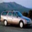

In [ ]:
labels = pd.read_csv('cifar10Labels.csv', index_col=0)
# View an image
img_idx = 5
print(labels.label[img_idx])
Image.open('cifar10/'+str(img_idx)+'.png')


In [ ]:
# Splitting data into Train and Test data
from sklearn.model_selection import train_test_split
y_train, y_test = train_test_split(labels.label, test_size=0.3, random_state=42)
train_idx, test_idx = y_train.index, y_test.index # Stroing indexes for later use
# Reading images for training
temp = []
for img_idx in y_train.index:
    img_path = os.path.join('cifar10/', str(img_idx) + '.png')
    img = np.array(Image.open(img_path)).astype('float32')
    temp.append(img)
X_train = np.stack(temp)
# Reading images for testing
temp = []
for img_idx in y_test.index:
    img_path = os.path.join('cifar10/', str(img_idx) + '.png')
    img = np.array(Image.open(img_path)).astype('float32')
    temp.append(img)
X_test = np.stack(temp)
# Normalizing image data
X_train = X_train/255.
X_test = X_test/255.


In [ ]:
# One-hot encoding 10 output classes
encode_X = LabelEncoder()
encode_X_fit = encode_X.fit_transform(y_train)
y_train = tf.keras.utils.to_categorical(encode_X_fit)

In [ ]:
# Defining CNN network
num_classes = 10
model = keras.models.Sequential([
    # Adding first convolutional layer
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(32, 32, 3), name='Conv_1'),
    # Normalizing the parameters from last layer to speed up the performance (optional)
    keras.layers.BatchNormalization(name='BN_1'),
    # Adding first pooling layer
    keras.layers.MaxPool2D(pool_size=(2, 2), name='MaxPool_1'),
    # Adding second convolutional layer
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.001), name='Conv_2'),
    keras.layers.BatchNormalization(name='BN_2'),
    # Adding second pooling layer
    keras.layers.MaxPool2D(pool_size=(2, 2), name='MaxPool_2'),
    # Flattens the input
    keras.layers.Flatten(name='Flat'),
    # Fully-Connected layer
    keras.layers.Dense(num_classes, activation='softmax', name='pred_layer')
])


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_1 (BatchNormalization)       │ (None, 32, 32, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_1 (MaxPooling2D)        │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_2 (BatchNormalization)       │ (None, 16, 16, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_2 (MaxPooling2D)        │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flat (Flatten)                  │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pred_layer (Dense)              │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,746 (237.29 KB)

 Trainable params: 60,554 (236.54 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cpfile = r'CIFAR10_checkpoint.keras' # Weights to be stored in Keras format
cb_checkpoint = keras.callbacks.ModelCheckpoint(cpfile, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
epochs = 5
model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[cb_checkpoint])

Epoch 1/5
860/875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4143 - loss: 2.0201
Epoch 1: val_accuracy improved from -inf to 0.52429, saving model to CIFAR10_checkpoint.keras
875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4154 - loss: 2.0149 - val_accuracy: 0.5243 - val_loss: 1.5372
Epoch 2/5
861/875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5960 - loss: 1.2542
Epoch 2: val_accuracy did not improve from 0.52429
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5961 - loss: 1.2537 - val_accuracy: 0.4953 - val_loss: 1.7781
Epoch 3/5
870/875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6599 - loss: 1.0499
Epoch 3: val_accuracy improved from 0.52429 to 0.59614, saving model to CIFAR10_checkpoint.keras
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6598 - loss: 1.0499 - val_accuracy: 0.5961 - val_loss: 1.2675
Epoch 4/5
871/875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7098 - loss: 0.9038
Epoch 4: val_accuracy improved from 0.59614 to 0.64829, saving mod

In [ ]:
# << DeprecationWarning: The truth value of an empty array is ambiguous >> can arise due to a NumPy version higher than 1.13.3.
# The issue will be updated in upcoming version.
pred = encode_X.inverse_transform(np.argmax(model.predict(X_test[:10]), axis=1))
act = y_test[:10]
res = pd.DataFrame([pred, act]).T
res.columns = ['predicted', 'actual']
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


,predicted,actual
0,cat,horse
1,ship,ship
2,airplane,airplane
3,frog,frog
4,automobile,automobile
5,frog,frog
6,ship,ship
7,ship,airplane
8,frog,frog
9,cat,dog


In [ ]:
from mlxtend.evaluate import scoring
train_acc = scoring(encode_X.inverse_transform(np.argmax(model.predict(X_train), axis=1)),
                   encode_X.inverse_transform([np.argmax(x) for x in y_train]))
test_acc = scoring(encode_X.inverse_transform(np.argmax(model.predict(X_test), axis=1)), y_test)
print('Train accuracy: ', np.round(train_acc, 5))
print('Test accuracy: ', np.round(test_acc, 5))

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train accuracy:  0.2606
Test accuracy:  0.3456


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


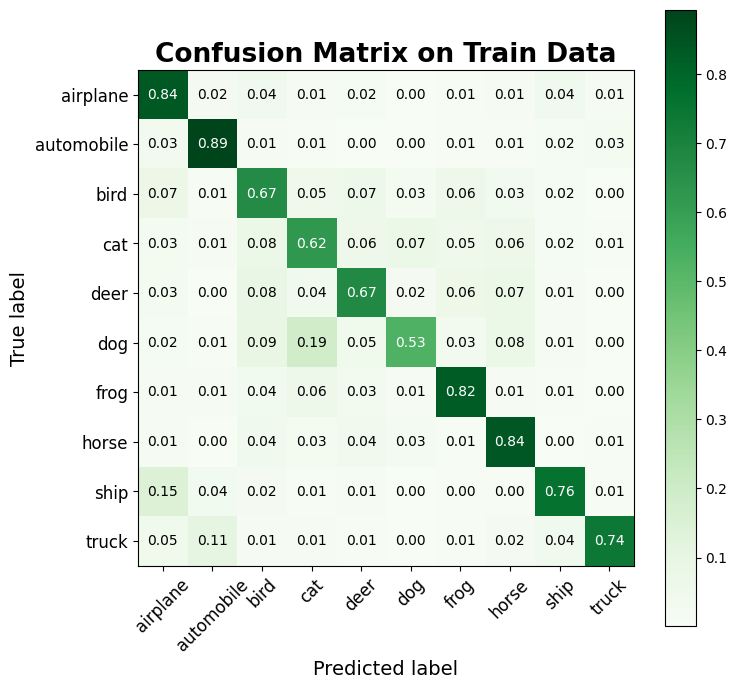

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


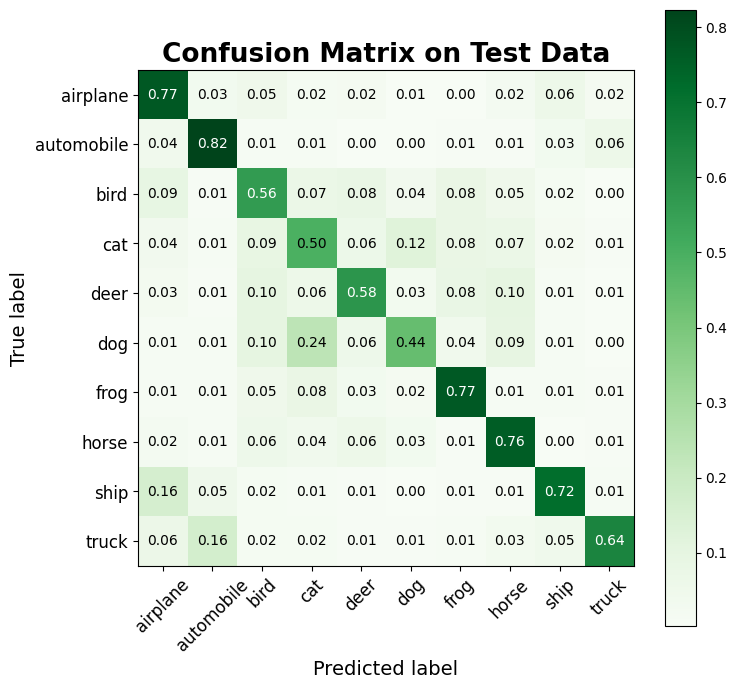

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
def plot_cm(cm, text):
    class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    plot_confusion_matrix(conf_mat=cm,
                          colorbar=True, figsize=(8, 8), cmap='Greens',
                          show_absolute=False, show_normed=True)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, class_names, fontsize=12)
    plt.xlabel('Predicted label', fontsize=14)
    plt.ylabel('True label', fontsize=14)
    plt.title(text, fontsize=19, weight='bold')
    plt.show()
# Train Accuracy
train_cm = confusion_matrix(y_target=encode_X.inverse_transform([np.argmax(x) for x in y_train]),
                          y_predicted=encode_X.inverse_transform(np.argmax(model.predict(X_train), axis=1)),
                          binary=False)
plot_cm(train_cm, 'Confusion Matrix on Train Data')
# Test Accuracy
test_cm = confusion_matrix(y_target=y_test,
                          y_predicted=encode_X.inverse_transform(np.argmax(model.predict(X_test), axis=1)),
                          binary=False)
plot_cm(test_cm, 'Confusion Matrix on Test Data')

In [ ]:
!pip install vis

In [ ]:
!pip install tf.keras-vis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.9 MB/s eta 0:00:00


In [ ]:
! pip install tensorflow

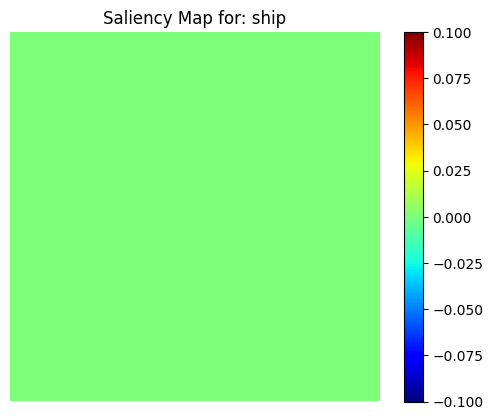

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input  # Use appropriate preprocessing
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

img_path = f"cifar10/{test_idx[6]}.png"
image = load_img(img_path, target_size=(32, 32))  # Adjust if using a different input size
image = img_to_array(image)
image = preprocess_input(image)  # optional; depends on model
image = np.expand_dims(image, axis=0)

# Create score function for the class index (e.g., 'ship')
target_class_index = 8  # e.g., class index for 'ship'
score = CategoricalScore([target_class_index])

# Create Saliency object (no model_modifier needed for Sequential)
saliency = Saliency(model, clone=True)

# Compute saliency map
saliency_map = saliency(score, image)

# Visualize
plt.imshow(saliency_map[0], cmap='jet')
plt.title(f'Saliency Map for: {encode_X.inverse_transform([target_class_index])[0]}')
plt.axis('off')
plt.colorbar()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


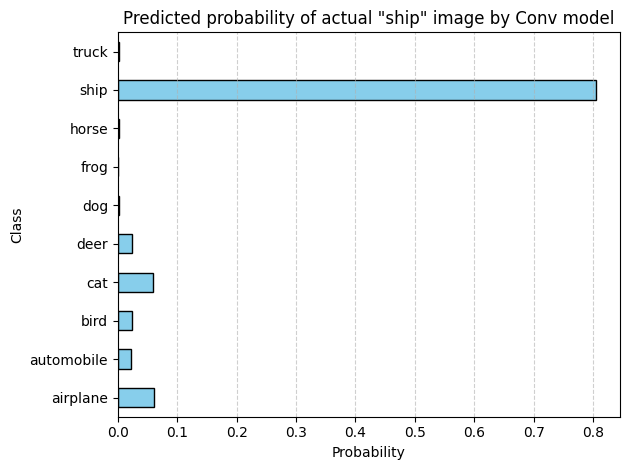

In [ ]:

# Predict class probabilities for a single test image (e.g., X_test[6])
ship_prob = model.predict(X_test[6:7]).ravel()  # .ravel() flattens it to 1D

# Convert probabilities into a pandas Series for visualization
prob_series = pd.Series(ship_prob, index=encode_X.inverse_transform(np.arange(len(ship_prob))))

# Plot as horizontal bar chart
prob_series.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Predicted probability of actual "ship" image by Conv model')
plt.xlabel('Probability')
plt.ylabel('Class')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils import utils
import tensorflow.keras as keras
layer_idx = len(model.layers) - 1

# Step 2: Set the activation to linear
model.layers[layer_idx].activation = keras.activations.linear

# Step 3: Apply the modification (this returns a modified clone of the model)
model = utils.apply_modifications(model)


ImportError: cannot import name 'utils' from 'tf_keras_vis.utils' (/usr/local/lib/python3.11/dist-packages/tf_keras_vis/utils/__init__.py)

In [ ]:
plt.figure(figsize=(12,6))
for i in range(len(classes)):
    plt.subplot(2, 5, i + 1)
    grads = visualize_saliency(model, layer_idx, filter_indices=i, seed_input=ship_img, backprop_modifier='guided')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes[i])
    plt.title('p=' + str(np.round(ship_prob[i], 4)))
    plt.imshow(grads, cmap='jet')
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
for i in range(len(classes)):
    plt.subplot(2, 5, i + 1)
    cam_grads = visualize_cam(model, layer_idx, filter_indices=i, seed_input=ship_img, backprop_modifier='guided',
                             penultimate_layer_idx=utils.find_layer_idx(model, 'BN_2'))# batch_normalization_14
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes[i])
    plt.title('p=' + str(np.round(ship_prob[i], 4)))
    plt.imshow(overlay(cam_grads, ship_img, alpha=0.3))
plt.show()


In the previous resource, we have built a CNN model with stride 1, and filter size as (3x3). In this resource, let us build four CNN models by varying these two parameters and checking how does the accuracy is being affected.

Case 1 - Stride: 2 and Filter size: (3x3)


In [ ]:
num_classes = 10
model = keras.models.Sequential([
    # Adding first convolutional layer
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=2, padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(32, 32, 3), name='Conv_1'),
    # Normalizing the parameters from last layer to speed up the performance (optional)
    keras.layers.BatchNormalization(name='BN_1'),
    # Adding first pooling layer
    keras.layers.MaxPool2D(pool_size=(2, 2), name='MaxPool_1'),
    # Adding second convolutional layer
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=2, padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.001), name='Conv_2'),
    keras.layers.BatchNormalization(name='BN_2'),
    # Adding second pooling layer
    keras.layers.MaxPool2D(pool_size=(2, 2), name='MaxPool_2'),
    # Flattens the input
    keras.layers.Flatten(name='Flat'),
    # Fully-Connected layer
    keras.layers.Dense(num_classes, activation='softmax', name='pred_layer')
])
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cpfile = r'CIFAR10_checkpoint_stride_2.hdf5' # Weights to be stored in HDF5 format
cb_checkpoint = keras.callbacks.ModelCheckpoint(cpfile, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
epochs = 5
model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[cb_checkpoint])
from mlxtend.evaluate import scoring
actual_train = [np.argmax(x) for x in y_train]
predicted_train = model.predict_classes(X_train)
print('Train accuracy: ', scoring(actual_train, predicted_train, metric='accuracy') * 100) # Change metric for more.
actual_test = [np.argmax(x) for x in y_test]
predicted_test = model.predict_classes(X_test)
print('Test accuracy: ', scoring(actual_test, predicted_test, metric='accuracy') * 100) # Change metric for more.


Case 2 - Stride: 3 and Filter size: (3x3)

In [ ]:
num_classes = 10
model = keras.models.Sequential([
    # Adding first convolutional layer
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=3, padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(32, 32, 3), name='Conv_1'),
    # Normalizing the parameters from last layer to speed up the performance (optional)
    keras.layers.BatchNormalization(name='BN_1'),
    # Adding first pooling layer
    keras.layers.MaxPool2D(pool_size=(2, 2), name='MaxPool_1'),
    # Adding second convolutional layer
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=3, padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.001), name='Conv_2'),
    keras.layers.BatchNormalization(name='BN_2'),
    # Adding second pooling layer
    keras.layers.MaxPool2D(pool_size=(2, 2), name='MaxPool_2'),
    # Flattens the input
    keras.layers.Flatten(name='Flat'),
    # Fully-Connected layer
    keras.layers.Dense(num_classes, activation='softmax', name='pred_layer')
])
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cpfile = r'CIFAR10_checkpoint_stride_3.hdf5' # Weights to be stored in HDF5 format
cb_checkpoint = keras.callbacks.ModelCheckpoint(cpfile, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
epochs = 5
model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[cb_checkpoint])
actual_train = [np.argmax(x) for x in y_train]
predicted_train = model.predict_classes(X_train)
print('Train accuracy: ', scoring(actual_train, predicted_train, metric='accuracy') * 100) # Change metric for more.
actual_test = [np.argmax(x) for x in y_test]
predicted_test = model.predict_classes(X_test)
print('Test accuracy: ', scoring(actual_test, predicted_test, metric='accuracy') * 100) # Change metric for more.


Case 3 - Stride 1 and Filter size: (2x2)

In [ ]:
num_classes = 10
model = keras.models.Sequential([
    # Adding first convolutional layer
    keras.layers.Conv2D(filters=32, kernel_size=(2, 2), strides=1, padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(32, 32, 3), name='Conv_1'),
    # Normalizing the parameters from last layer to speed up the performance (optional)
    keras.layers.BatchNormalization(name='BN_1'),
    # Adding first pooling layer
    keras.layers.MaxPool2D(pool_size=(2, 2), name='MaxPool_1'),
    # Adding second convolutional layer
    keras.layers.Conv2D(filters=64, kernel_size=(2, 2), strides=1, padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.001), name='Conv_2'),
    keras.layers.BatchNormalization(name='BN_2'),
    # Adding second pooling layer
    keras.layers.MaxPool2D(pool_size=(2, 2), name='MaxPool_2'),
    # Flattens the input
    keras.layers.Flatten(name='Flat'),
    # Fully-Connected layer
    keras.layers.Dense(num_classes, activation='softmax', name='pred_layer')
])
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cpfile = r'CIFAR10_checkpoint_filter_2.hdf5' # Weights to be stored in HDF5 format
cb_checkpoint = keras.callbacks.ModelCheckpoint(cpfile, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
epochs = 5
model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[cb_checkpoint])
actual_train = [np.argmax(x) for x in y_train]
predicted_train = model.predict_classes(X_train)
print('Train accuracy: ', scoring(actual_train, predicted_train, metric='accuracy') * 100) # Change metric for more.
actual_test = [np.argmax(x) for x in y_test]
predicted_test = model.predict_classes(X_test)
print('Test accuracy: ', scoring(actual_test, predicted_test, metric='accuracy') * 100) # Change metric for more.


Case 4 - Stride: 1 and Filter size: (4x4)

In [ ]:
num_classes = 10
model = keras.models.Sequential([
    # Adding first convolutional layer
    keras.layers.Conv2D(filters=32, kernel_size=(4, 4), strides=1, padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(32, 32, 3), name='Conv_1'),
    # Normalizing the parameters from last layer to speed up the performance (optional)
    keras.layers.BatchNormalization(name='BN_1'),
    # Adding first pooling layer
    keras.layers.MaxPool2D(pool_size=(2, 2), name='MaxPool_1'),
    # Adding second convolutional layer
    keras.layers.Conv2D(filters=64, kernel_size=(4, 4), strides=1, padding='same', activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.001), name='Conv_2'),
    keras.layers.BatchNormalization(name='BN_2'),
    # Adding second pooling layer
    keras.layers.MaxPool2D(pool_size=(2, 2), name='MaxPool_2'),
    # Flattens the input
    keras.layers.Flatten(name='Flat'),
    # Fully-Connected layer
    keras.layers.Dense(num_classes, activation='softmax', name='pred_layer')
])
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cpfile = r'CIFAR10_checkpoint_filter_4.hdf5' # Weights to be stored in HDF5 format
cb_checkpoint = keras.callbacks.ModelCheckpoint(cpfile, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
epochs = 5
model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[cb_checkpoint])
actual_train = [np.argmax(x) for x in y_train]
predicted_train = model.predict_classes(X_train)
print('Train accuracy: ', scoring(actual_train, predicted_train, metric='accuracy') * 100) # Change metric for more.
actual_test = [np.argmax(x) for x in y_test]
predicted_test = model.predict_classes(X_test)
print('Test accuracy: ', scoring(actual_test, predicted_test, metric='accuracy') * 100) # Change metric for more.
